In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn streamlit

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import streamlit as st

Uploading Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving sample_submission.csv to sample_submission (1).csv
Saving train.csv to train (1).csv
Saving test.csv to test (1).csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [ ]:
train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [ ]:
test.describe().T

count         mean          std     min      25%     50%  \
Id             1459.0  2190.000000   421.321334  1461.0  1825.50  2190.0   
MSSubClass     1459.0    57.378341    42.746880    20.0    20.00    50.0   
LotFrontage    1232.0    68.580357    22.376841    21.0    58.00    67.0   
LotArea        1459.0  9819.161069  4955.517327  1470.0  7391.00  9399.0   
OverallQual    1459.0     6.078821     1.436812     1.0     5.00     6.0   
OverallCond    1459.0     5.553804     1.113740     1.0     5.00     5.0   
YearBuilt      1459.0  1971.357779    30.390071  1879.0  1953.00  1973.0   
YearRemodAdd   1459.0  1983.662783    21.130467  1950.0  1963.00  1992.0   
MasVnrArea     1444.0   100.709141   177.625900     0.0     0.00     0.0   
BsmtFinSF1     1458.0   439.203704   455.268042     0.0     0.00   350.5   
BsmtFinSF2     1458.0    52.619342   176.753926     0.0     0.00     0.0   
BsmtUnfSF      1458.0   554.294925   437.260486     0.0   219.25   460.0   
TotalBsmtSF    1458.0  1046.117970   442.898624     0.0   784.00   988.0   
1stFlrSF       1459.0  1156.534613   398.165820   407.0   873.50  1079.0   
2ndFlrSF       1459.0   325.967786   420.610226     0.0     0.00     0.0   
LowQualFinSF   1459.0     3.543523    44.043251     0.0     0.00     0.0   
GrLivArea      1459.0  1486.045922   485.566099   407.0  1117.50  1432.0   
BsmtFullBath   1457.0     0.434454     0.530648     0.0     0.00     0.0   
BsmtHalfBath   1457.0     0.065202     0.252468     0.0     0.00     0.0   
FullBath       1459.0     1.570939     0.555190     0.0     1.00     2.0   
HalfBath       1459.0     0.377656     0.503017     0.0     0.00     0.0   
BedroomAbvGr   1459.0     2.854010     0.829788     0.0     2.00     3.0   
KitchenAbvGr   1459.0     1.042495     0.208472     0.0     1.00     1.0   
TotRmsAbvGrd   1459.0     6.385195     1.508895     3.0     5.00     6.0   
Fireplaces     1459.0     0.581220     0.647420     0.0     0.00     0.0   
GarageYrBlt    1381.0  1977.721217    26.431175  1895.0  1959.00  1979.0   
GarageCars     1458.0     1.766118     0.775945     0.0     1.00     2.0   
GarageArea     1458.0   472.768861   217.048611     0.0   318.00   480.0   
WoodDeckSF     1459.0    93.174777   127.744882     0.0     0.00     0.0   
OpenPorchSF    1459.0    48.313914    68.883364     0.0     0.00    28.0   
EnclosedPorch  1459.0    24.243317    67.227765     0.0     0.00     0.0   
3SsnPorch      1459.0     1.794380    20.207842     0.0     0.00     0.0   
ScreenPorch    1459.0    17.064428    56.609763     0.0     0.00     0.0   
PoolArea       1459.0     1.744345    30.491646     0.0     0.00     0.0   
MiscVal        1459.0    58.167923   630.806978     0.0     0.00     0.0   
MoSold         1459.0     6.104181     2.722432     1.0     4.00     6.0   
YrSold         1459.0  2007.769705     1.301740  2006.0  2007.00  2008.0   

                    75%      max  
Id              2554.50   2919.0  
MSSubClass        70.00    190.0  
LotFrontage       80.00    200.0  
LotArea        11517.50  56600.0  
OverallQual        7.00     10.0  
OverallCond        6.00      9.0  
YearBuilt       2001.00   2010.0  
YearRemodAdd    2004.00   2010.0  
MasVnrArea       164.00   1290.0  
BsmtFinSF1       753.50   4010.0  
BsmtFinSF2         0.00   1526.0  
BsmtUnfSF        797.75   2140.0  
TotalBsmtSF     1305.00   5095.0  
1stFlrSF        1382.50   5095.0  
2ndFlrSF         676.00   1862.0  
LowQualFinSF       0.00   1064.0  
GrLivArea       1721.00   5095.0  
BsmtFullBath       1.00      3.0  
BsmtHalfBath       0.00      2.0  
FullBath           2.00      4.0  
HalfBath           1.00      2.0  
BedroomAbvGr       3.00      6.0  
KitchenAbvGr       1.00      2.0  
TotRmsAbvGrd       7.00     15.0  
Fireplaces         1.00      4.0  
GarageYrBlt     2002.00   2207.0  
GarageCars         2.00      5.0  
GarageArea       576.00   1488.0  
WoodDeckSF       168.00   1424.0  
OpenPorchSF       72.00    742.0  
EnclosedPorch      0.00   1012.0  
3SsnPor

In [ ]:
train.shape

(1460, 81)

In [ ]:
test.shape

(1459, 80)

In [ ]:
train.duplicated().any()

False

In [ ]:
test.duplicated().any()

False

In [ ]:
train.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False  ...     False    True   True   
1        False        False      False  ...     False    True   True   
2        False        False      False  ...     False    True   True   
3        False        False      False  ...     False    True   True   
4        False        False      False  ...     False    True   True   
...        ...          ...        ...  ...       ...     ...    ...   
1455     False        False      False  ...     False    True   True   
1456     False        False      False  ...     False    True  False   
1457     False        False      False  ...     False    True  False   
1458     False        False      False  ...     False    True   True   
1459     False        False      False  ...     False    True   True   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            True    False   False   False     False          False      False  
1            True    False   False   False     False          False      False  
2            True    False   False   False     False          False      False  
3            True    False   False   False     False          False      False  
4            True    False   False   False     False          False      False  
...           ...      ...     ...     ...       ...            ...        ...  
1455         True    False   False   False     False          False      False  
1456         True    False   False   False     False          False      False  
1457        False    False   False   False     False          False      False  
1458         True    False   False   False     False          False      False  
1459         True    False   False   False     False          False      False  

[1460 rows x 81 columns]

In [ ]:
test.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1454  False       False     False        False    False   False   True   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
0        False        False      False  ...        False     False    True   
1        False        False      False  ...        False     False    True   
2        False        False      False  ...        False     False    True   
3        False        False      False  ...        False     False    True   
4        False        False      False  ...        False     False    True   
...        ...          ...        ...  ...          ...       ...     ...   
1454     False        False      False  ...        False     False    True   
1455     False        False      False  ...        False     False    True   
1456     False        False      False  ...        False     False    True   
1457     False        False      False  ...        False     False    True   
1458     False        False      False  ...        False     False    True   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0     False         True    False   False   False     False          False  
1      True        False    False   False   False     False          False  
2     False         True    False   False   False     False          False  
3      True         True    False   False   False     False          False  
4      True         True    False   False   False     False          False  
...     ...          ...      ...     ...     ...       ...            ...  
1454   True         True    False   False   False     False          False  
1455   True         True    False   False   False     False          False  
1456   True         True    False   False   False     False          False  
1457  False        False    False   False   False     False          False  
1458   True         True    False   False   False     False          False  

[1459 rows x 80 columns]

In [ ]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
train.drop(['Id'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)

Fill Missing values

In [ ]:
train_null_values = train.isnull().sum()
train_null_columns = train_null_values[train_null_values > 0]
print(train_null_columns)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
total_rows = len(train)
print(total_rows)

1460


In [ ]:
train.drop(columns=['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [ ]:
test_null_values = test.isnull().sum()
test_null_columns = test_null_values[test_null_values > 0]
print(test_null_columns)

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [ ]:
test.drop(columns=['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [ ]:
train_null_values = train.isnull().sum()
train_null_columns = train_null_values[train_null_values > 0]
print(train_null_columns)

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [ ]:
numerical_cols = train.select_dtypes(exclude=object).columns.tolist()
categorical_cols = train.select_dtypes(include=object).columns.tolist()

categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].median(), inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(), inplace=True)


In [ ]:
train_null_values = train.isnull().sum()
train_null_columns = train_null_values[train_null_values > 0]
print(train_null_columns)

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64


In [ ]:
train['BsmtQual'].fillna(train['BsmtQual'].mode()[0], inplace=True)
train['BsmtCond'].fillna(train['BsmtCond'].mode()[0], inplace=True)
train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0], inplace=True)
train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0], inplace=True)
train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0], inplace=True)
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
train['GarageType'].fillna(train['GarageType'].mode()[0], inplace=True)
train['GarageFinish'].fillna(train['GarageFinish'].mode()[0], inplace=True)
train['GarageQual'].fillna(train['GarageQual'].mode()[0], inplace=True)
train['GarageCond'].fillna(train['GarageCond'].mode()[0], inplace=True)

In [ ]:
train.isnull().sum().sum()

0

In [ ]:
test_null_values = test.isnull().sum()
test_null_columns = test_null_values[test_null_values > 0]
print(test_null_columns)

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64


In [ ]:
numerical_cols = test.select_dtypes(exclude=object).columns.tolist()
categorical_cols = test.select_dtypes(include=object).columns.tolist()

categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
test['LotFrontage'].fillna(test['LotFrontage'].median(), inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].median(), inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].median(), inplace=True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mode()[0], inplace=True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mode()[0], inplace=True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mode()[0], inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mode()[0], inplace=True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0], inplace=True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0], inplace=True)
test['GarageCars'].fillna(test['GarageCars'].mode()[0], inplace=True)
test['GarageArea'].fillna(test['GarageArea'].mode()[0], inplace=True)



In [ ]:
test_null_values = test.isnull().sum()
test_null_columns = test_null_values[test_null_values > 0]
print(test_null_columns)

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
KitchenQual      1
Functional       2
GarageType      76
GarageFinish    78
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64


In [ ]:
test['MSZoning'].fillna(test['MSZoning'].mode(), inplace=True)
test['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0], inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0], inplace=True)
test['BsmtQual'].fillna(test['BsmtQual'].mode()[0], inplace=True)
test['BsmtCond'].fillna(test['BsmtCond'].mode()[0], inplace=True)
test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0], inplace=True)
test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0], inplace=True)
test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0], inplace=True)
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0], inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0], inplace=True)
test['GarageType'].fillna(test['GarageType'].mode()[0], inplace=True)
test['GarageFinish'].fillna(test['GarageFinish'].mode()[0], inplace=True)
test['GarageQual'].fillna(test['GarageQual'].mode()[0], inplace=True)
test['GarageCond'].fillna(test['GarageCond'].mode()[0], inplace=True)
test['SaleType'].fillna(test['SaleType'].mode()[0], inplace=True)

In [ ]:
train.isnull().sum().sum()

0

In [ ]:
train.dropna(inplace=True)
test.dropna(inplace=True)

Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

train_encoded = train.copy()

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train_encoded[col])
    label_encoders[col] = le

print(train_encoded)

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             60         3         65.0     8450       1         3   
1             20         3         80.0     9600       1         3   
2             60         3         68.0    11250       1         0   
3             70         3         60.0     9550       1         0   
4             60         3         84.0    14260       1         0   
...          ...       ...          ...      ...     ...       ...   
1455          60         3         62.0     7917       1         3   
1456          20         3         85.0    13175       1         3   
1457          70         3         66.0     9042       1         3   
1458          20         3         68.0     9717       1         3   
1459          20         3         75.0     9937       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
0               3          0          4          0  ...              0   
1          

In [ ]:
train_encoded.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0          0          4          0  ...              0          0   
1          0          2          0  ...              0          0   
2          0          4          0  ...              0          0   
3          0          0          0  ...            272          0   
4          0          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         8              4   
1            0         0        0       5    2007         8              4   
2            0         0        0       9    2008         8              4   
3            0         0        0       2    2006         8              0   
4            0         0        0      12    2008         8              4   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 74 columns]

In [ ]:
test_encoded = test.copy()

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    test_encoded[col] = le.fit_transform(test_encoded[col])
    label_encoders[col] = le
print(test_encoded)

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             20         2         80.0    11622       1         3   
1             20         3         81.0    14267       1         0   
2             60         3         74.0    13830       1         0   
3             60         3         78.0     9978       1         0   
4            120         3         43.0     5005       1         0   
...          ...       ...          ...      ...     ...       ...   
1454         160         4         21.0     1936       1         3   
1455         160         4         21.0     1894       1         3   
1456          20         3        160.0    20000       1         3   
1457          85         3         62.0    10441       1         3   
1458          60         3         74.0     9627       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
0               3          0          4          0  ...            0   
1              

In [ ]:
test_encoded.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20         2         80.0    11622       1         3            3   
1          20         3         81.0    14267       1         0            3   
2          60         3         74.0    13830       1         0            3   
3          60         3         78.0     9978       1         0            3   
4         120         3         43.0     5005       1         0            1   

   Utilities  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0          0          4          0  ...            0              0   
1          0          0          0  ...           36              0   
2          0          4          0  ...           34              0   
3          0          4          0  ...           36              0   
4          0          4          0  ...           82              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0          0          120         0        0       6    2010         8   
1          0            0         0    12500       6    2010         8   
2          0            0         0        0       3    2010         8   
3          0            0         0        0       6    2010         8   
4          0          144         0        0       1    2010         8   

   SaleCondition  
0              4  
1              4  
2              4  
3              4  
4              4  

[5 rows x 73 columns]

In [ ]:
train = train_encoded
test = test_encoded

Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)

Check for outliers

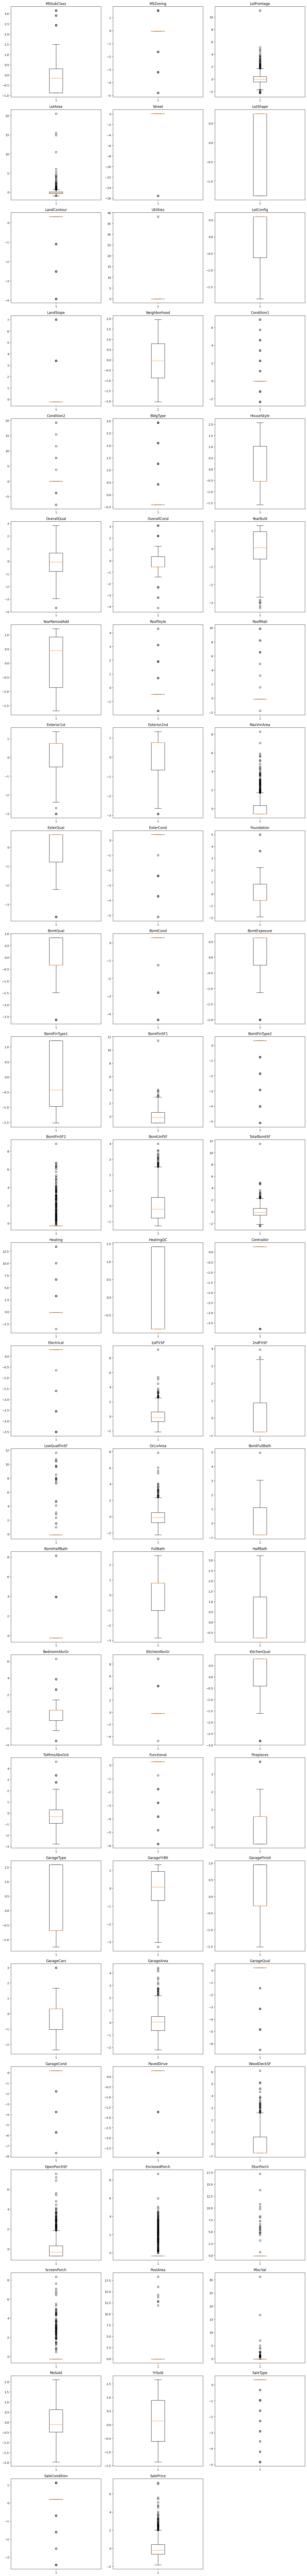

In [ ]:
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]

num_cols = len(numerical_cols)

fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(train[col])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
outliers_count = {}

# Calculate the number of outliers for each numerical column
for col in numerical_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    num_outliers = ((train[col] < lower_bound) | (train[col] > upper_bound)).sum()
    outliers_count[col] = num_outliers

# Print the number of outliers for each numerical column
for col, count in outliers_count.items():
    print(f"{col}: {count} outliers")

MSSubClass: 103 outliers
MSZoning: 309 outliers
LotFrontage: 106 outliers
LotArea: 69 outliers
Street: 6 outliers
LotShape: 0 outliers
LandContour: 149 outliers
Utilities: 1 outliers
LotConfig: 0 outliers
LandSlope: 78 outliers
Neighborhood: 0 outliers
Condition1: 200 outliers
Condition2: 15 outliers
BldgType: 240 outliers
HouseStyle: 0 outliers
OverallQual: 2 outliers
OverallCond: 125 outliers
YearBuilt: 9 outliers
YearRemodAdd: 0 outliers
RoofStyle: 319 outliers
RoofMatl: 26 outliers
Exterior1st: 21 outliers
Exterior2nd: 20 outliers
MasVnrArea: 98 outliers
ExterQual: 52 outliers
ExterCond: 178 outliers
Foundation: 9 outliers
BsmtQual: 121 outliers
BsmtCond: 112 outliers
BsmtExposure: 221 outliers
BsmtFinType1: 0 outliers
BsmtFinSF1: 7 outliers
BsmtFinType2: 166 outliers
BsmtFinSF2: 167 outliers
BsmtUnfSF: 29 outliers
TotalBsmtSF: 61 outliers
Heating: 32 outliers
HeatingQC: 0 outliers
CentralAir: 95 outliers
Electrical: 125 outliers
1stFlrSF: 20 outliers
2ndFlrSF: 2 outliers
LowQualFi

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

train = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
outliers_count = {}

# Calculate the number of outliers for each numerical column
for col in numerical_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    num_outliers = ((train[col] < lower_bound) | (train[col] > upper_bound)).sum()
    outliers_count[col] = num_outliers

# Print the number of outliers for each numerical column
for col, count in outliers_count.items():
    print(f"{col}: {count} outliers")

MSSubClass: 0 outliers
MSZoning: 0 outliers
LotFrontage: 0 outliers
LotArea: 0 outliers
Street: 0 outliers
LotShape: 0 outliers
LandContour: 0 outliers
Utilities: 0 outliers
LotConfig: 0 outliers
LandSlope: 0 outliers
Neighborhood: 0 outliers
Condition1: 0 outliers
Condition2: 0 outliers
BldgType: 0 outliers
HouseStyle: 0 outliers
OverallQual: 0 outliers
OverallCond: 0 outliers
YearBuilt: 0 outliers
YearRemodAdd: 0 outliers
RoofStyle: 0 outliers
RoofMatl: 0 outliers
Exterior1st: 0 outliers
Exterior2nd: 0 outliers
MasVnrArea: 0 outliers
ExterQual: 0 outliers
ExterCond: 0 outliers
Foundation: 0 outliers
BsmtQual: 0 outliers
BsmtCond: 0 outliers
BsmtExposure: 0 outliers
BsmtFinType1: 0 outliers
BsmtFinSF1: 0 outliers
BsmtFinType2: 0 outliers
BsmtFinSF2: 0 outliers
BsmtUnfSF: 0 outliers
TotalBsmtSF: 0 outliers
Heating: 0 outliers
HeatingQC: 0 outliers
CentralAir: 0 outliers
Electrical: 0 outliers
1stFlrSF: 0 outliers
2ndFlrSF: 0 outliers
LowQualFinSF: 0 outliers
GrLivArea: 0 outliers
BsmtF

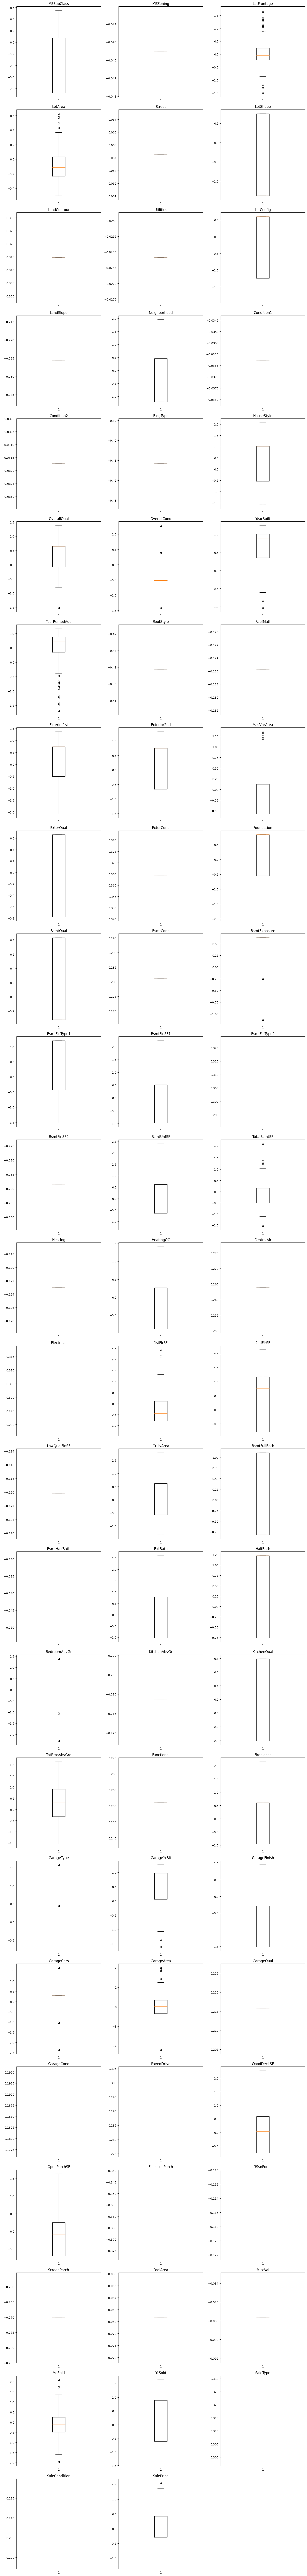

In [ ]:
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]

num_cols = len(numerical_cols)

fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(train[col])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
train.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0     0.073375 -0.045532    -0.220875 -0.207142  0.064238  0.750731   
2     0.073375 -0.045532    -0.084636  0.073480  0.064238 -1.378933   
31   -0.872563 -0.045532    -0.039223 -0.197721  0.064238 -1.378933   
49   -0.872563 -0.045532    -0.175462 -0.278099  0.064238  0.750731   
57    0.073375 -0.045532     0.869037  0.113068  0.064238 -1.378933   

    LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
0      0.314667   -0.02618   0.604670  -0.225716  ...      -0.359325   
2      0.314667   -0.02618   0.604670  -0.225716  ...      -0.359325   
31     0.314667   -0.02618  -1.244809  -0.225716  ...      -0.359325   
49     0.314667   -0.02618   0.604670  -0.225716  ...      -0.359325   
57     0.314667   -0.02618  -1.861302  -0.225716  ...      -0.359325   

    3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SaleType  \
0   -0.116339    -0.270208 -0.068692 -0.087688 -1.599111  0.138777  0.313867   
2   -0.116339    -0.270208 -0.068692 -0.087688  0.990891  0.138777  0.313867   
31  -0.116339    -0.270208 -0.068692 -0.087688 -0.119110  0.138777  0.313867   
49  -0.116339    -0.270208 -0.068692 -0.087688 -1.969111 -0.614439  0.313867   
57  -0.116339    -0.270208 -0.068692 -0.087688  0.620891 -1.367655  0.313867   

    SaleCondition  SalePrice  
0        0.208502   0.347273  
2        0.208502   0.536154  
31       0.208502  -0.397546  
49       0.208502  -0.678977  
57       0.208502   0.196169  

[5 rows x 74 columns]

In [ ]:
correlation_matrix = train_encoded.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

print("\nCorrelation with SalePrice:")
print(correlation_with_target)


Correlation with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
HeatingQC      -0.400178
GarageFinish   -0.537242
KitchenQual    -0.589189
BsmtQual       -0.618025
ExterQual      -0.636884
Name: SalePrice, Length: 74, dtype: float64


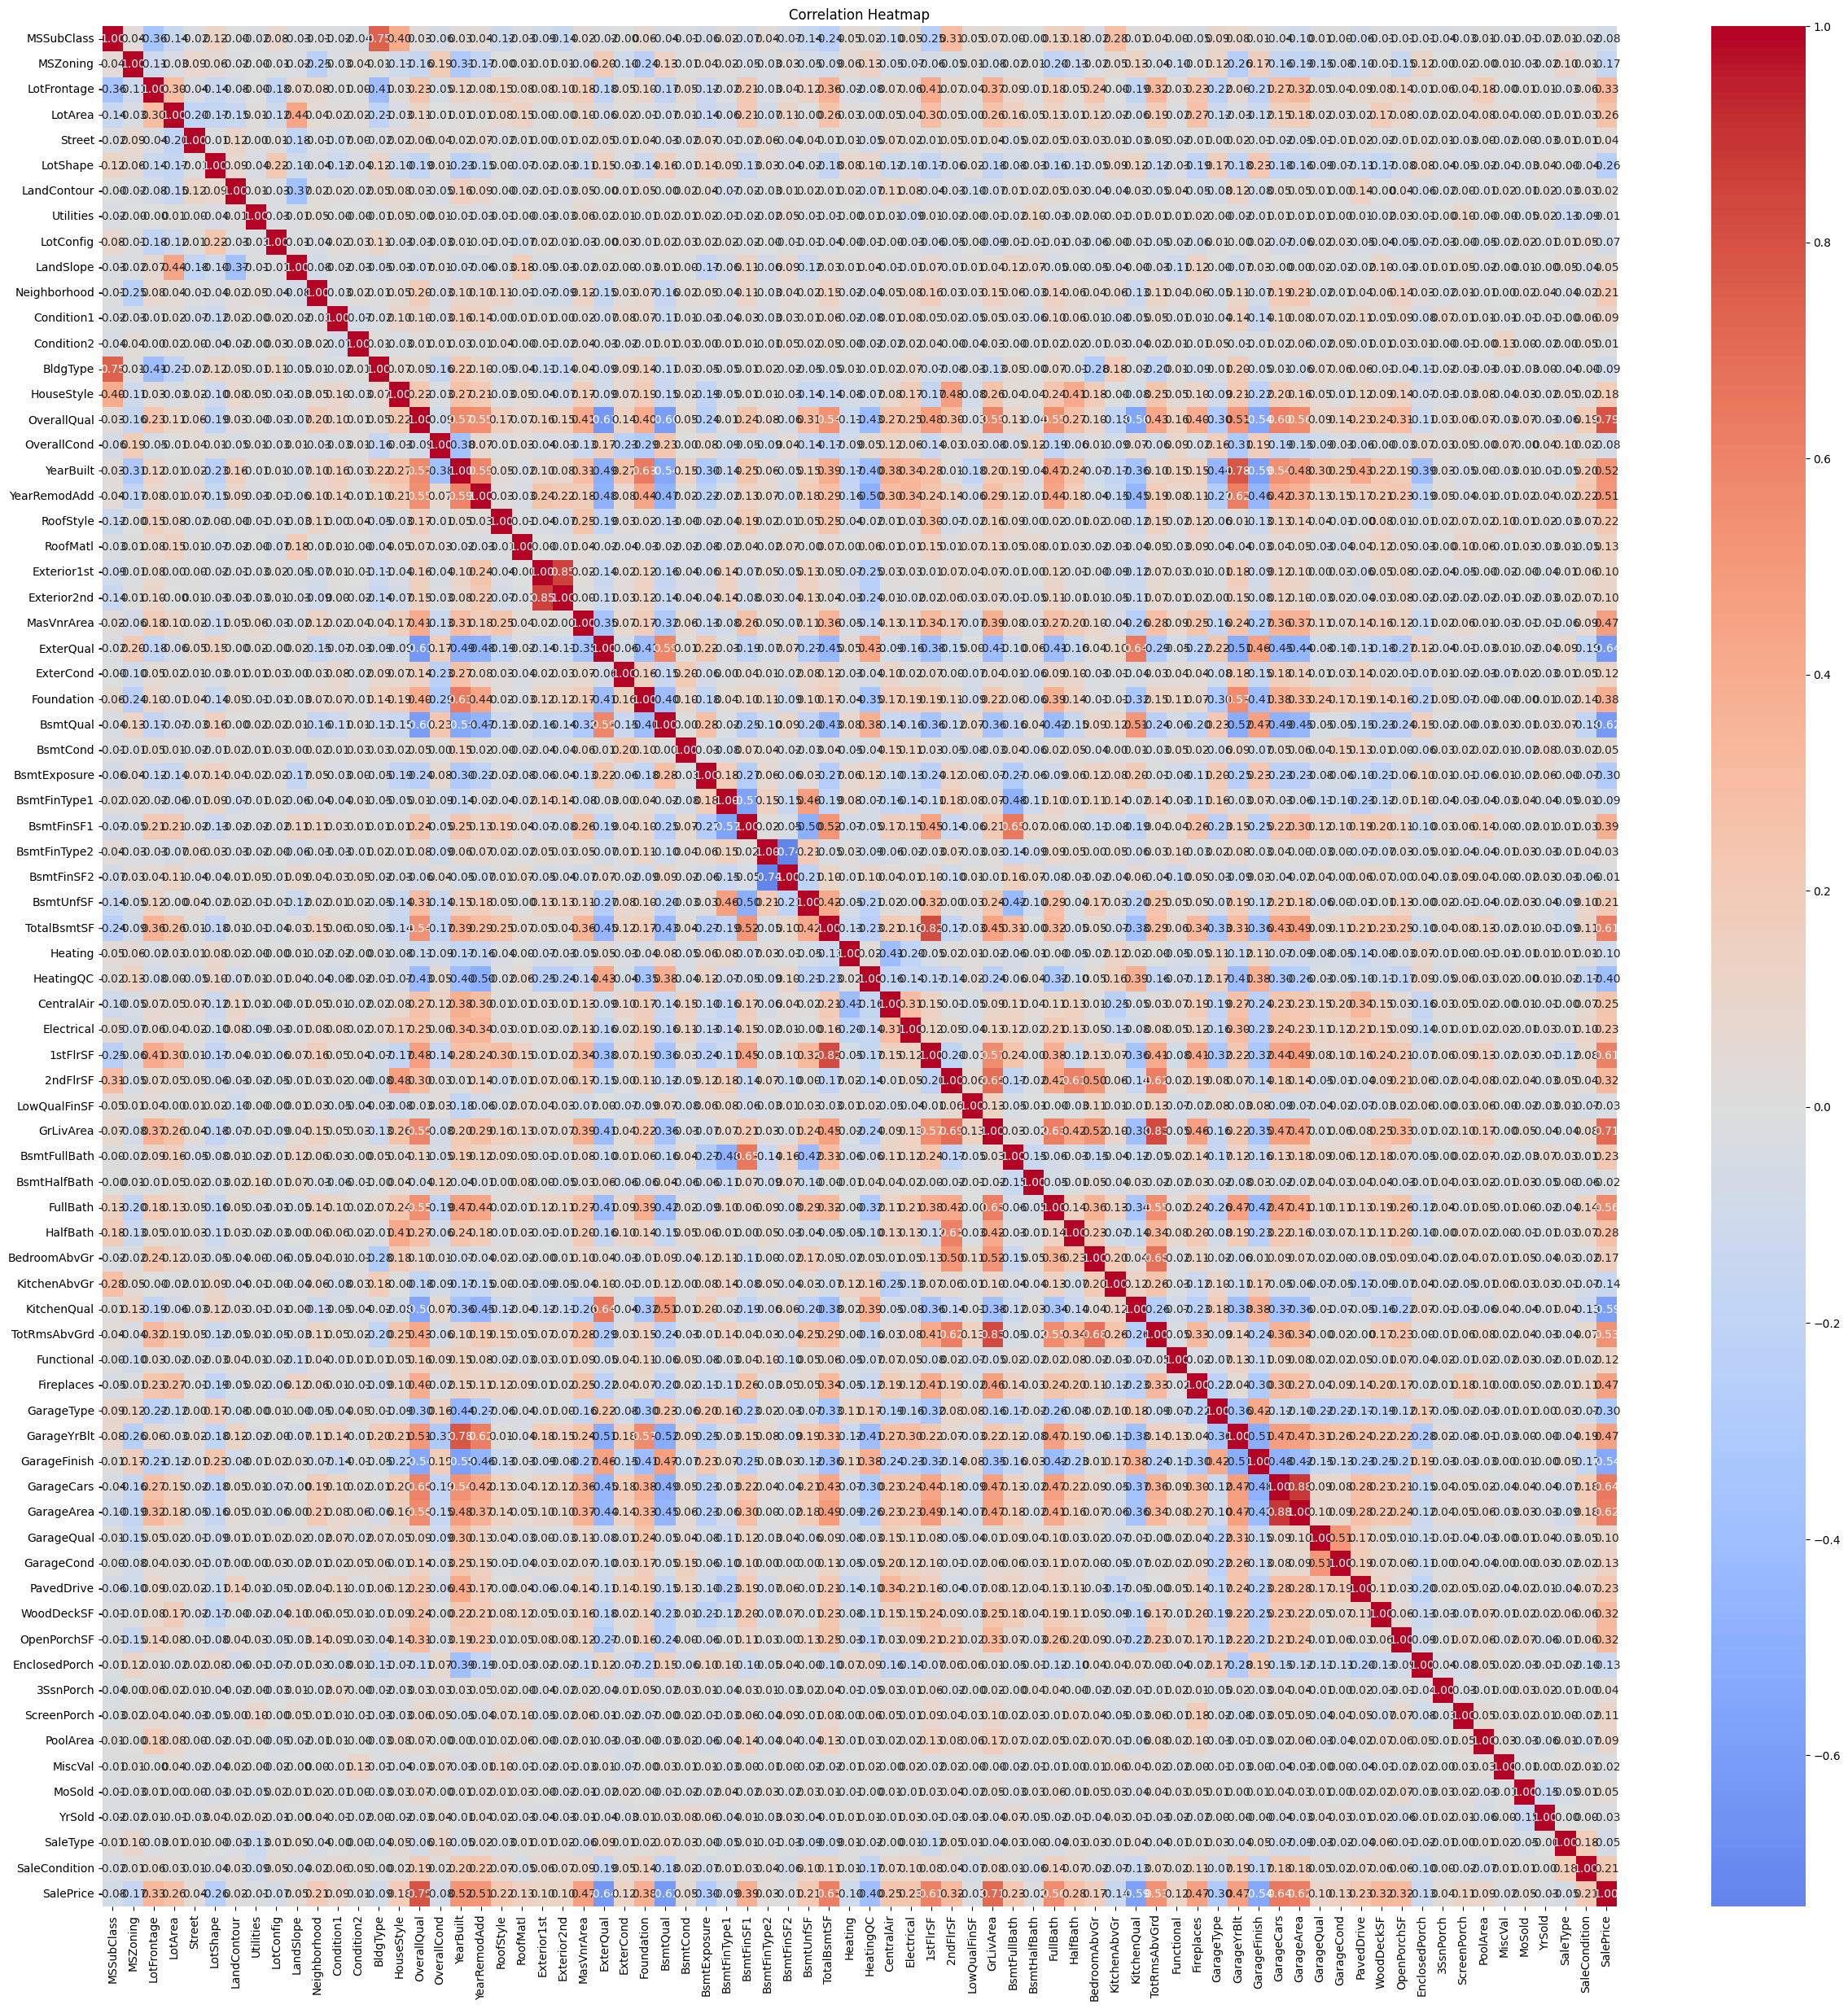

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = train[['OverallQual']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.1466732779183593
Root Mean Squared Error (RMSE): 0.382979474539249
Mean Absolute Error (MAE): 0.2954252350476676
R-squared (R²): 0.6017616922744722


Multible Regression

In [ ]:
x = train.drop(columns=['SalePrice'])
y = train['SalePrice'].values.reshape(-1, 1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=22)

In [ ]:
model = LinearRegression()

model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
ypred = model.predict(xtest)

mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.031344896508783485
Root Mean Squared Error (RMSE): 0.17704489969717704
Mean Absolute Error (MAE): 0.13714622413822297
R-squared (R²): 0.9290943308083461


lasso Regression

In [ ]:
model= Lasso(alpha=0.01 )
model.fit(xtrain, ytrain)
prediction = model.predict(xtest)

In [ ]:
ypred = model.predict(xtest)

mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.04745258059439483
Root Mean Squared Error (RMSE): 0.21783613243535802
Mean Absolute Error (MAE): 0.16919824981514514
R-squared (R²): 0.892656943978947


Redge Regression

In [ ]:
model= Ridge(alpha=0.000001 )
model.fit(xtrain, ytrain)
prediction = model.predict(xtest)

In [ ]:
ypred = model.predict(xtest)

mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.03134490224751017
Root Mean Squared Error (RMSE): 0.1770449159041574
Mean Absolute Error (MAE): 0.13714623797513004
R-squared (R²): 0.9290943178267032


the best result given by multible linear regression followed by redge